In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
 SELECT city_data.year,
          city_data.avg_temp as city_temp,
          global_data.avg_temp as global_temp  
FROM city_data, global_data  
          WHERE city_data.year = global_data.year        
          AND NOT city_data.avg_temp IS NULL        
          AND city_data.city = 'Toronto'


The above SQL query generates the average city temperature for Toronto and global average temperature for the years where the data is available for both Toronto and global temperatures.

In [54]:
#Gather and read the CSV file
df = pd.read_csv('Explore_weathers_results.csv')

In [55]:
#Assess the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         264 non-null    int64  
 1   city_temp    264 non-null    float64
 2   global_temp  264 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.3 KB


In [56]:
df.shape

(264, 3)

In [57]:
df.head()

,year,city_temp,global_temp
0,1750,6.29,8.72
1,1751,6.84,7.98
2,1752,-1.10,5.78
3,1753,5.76,8.39
4,1754,5.94,8.47


In [58]:
df.tail()

,year,city_temp,global_temp
259,2009,6.28,9.51
260,2010,7.77,9.70
261,2011,7.30,9.52
262,2012,8.66,9.51
263,2013,8.46,9.61


From the above table we can see that the data for global average and Toronto average temperatures are available from 1750 to 2013 with 264 entries for both.
We have a clean dataframe and can proceed with data visualization and analysis.  We will plot a line graph and compare.

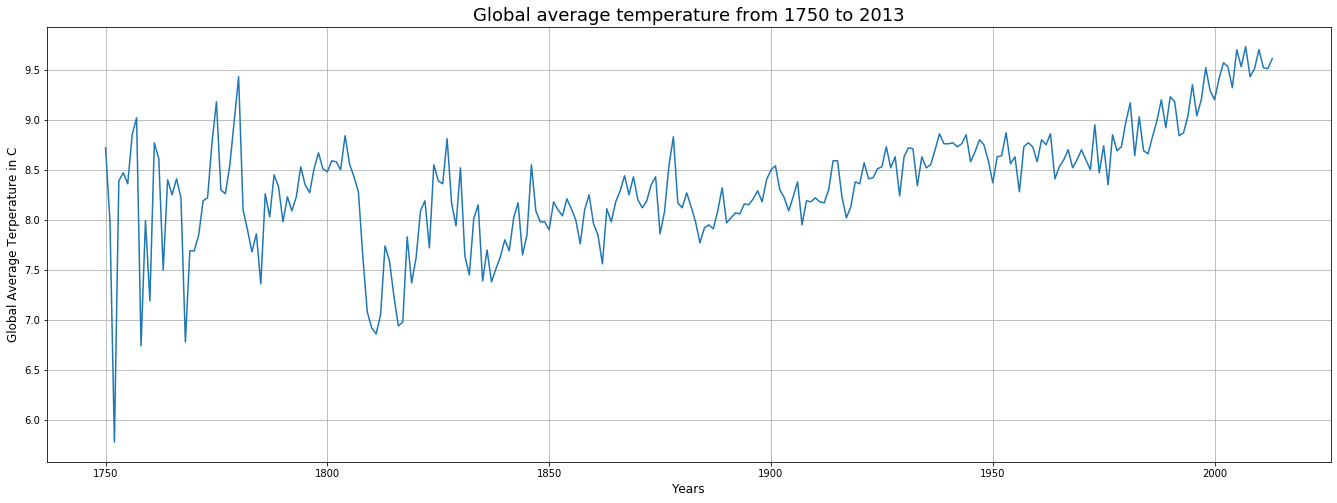

In [60]:
#Visualization of average global temperature from 1750 to 2013
plt.figure(figsize = (23,8))
plt.ylabel('Global Average Terperature in C', fontsize = 12)
plt.xlabel('Years', fontsize = 12)
plt.title('Global average temperature from 1750 to 2013', fontsize = 18)
plt.grid(True)
plt.plot(df['year'],df['global_temp']);

Similarly we can plot a line graph for local average temperature of Toronto over the years to see how the temperature variation has been.

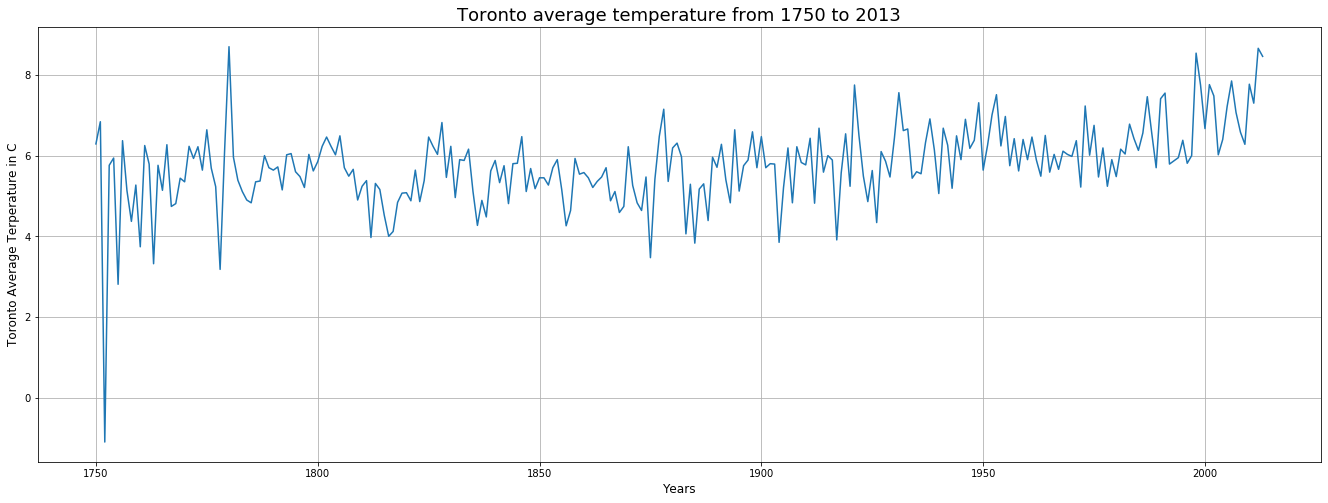

In [90]:
#Visualization of Toronto average temperature from 1750 to 2013
plt.figure(figsize = (23,8))
plt.ylabel('Toronto Average Terperature in C', fontsize = 12)
plt.xlabel('Years', fontsize = 12)
plt.title('Toronto average temperature from 1750 to 2013', fontsize = 18)
plt.grid(True)
plt.plot(df['year'],df['city_temp']);

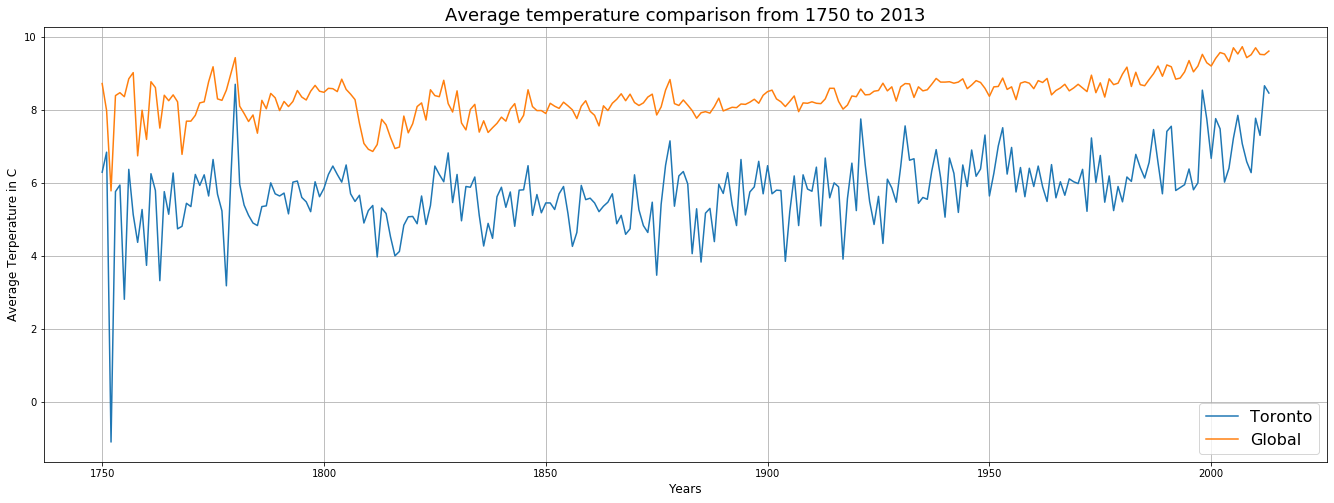

In [83]:
#Visualization of Toronto average temperature and global average temperature comparison from 1750 to 2013
plt.figure(figsize = (23,8))
plt.ylabel('Average Terperature in C', fontsize = 12)
plt.xlabel('Years', fontsize = 12)
plt.title('Average temperature comparison from 1750 to 2013', fontsize = 18)
plt.grid(True)
plt.plot(df['year'],df['city_temp'], label = 'Toronto')
plt.plot(df['year'],df['global_temp'], label = 'Global')
plt.legend(loc = 4, fontsize = 16);

From the above line graph 1, I observed that there were too many spikes in the graph which made it difficult to interpret the data. Secondly, there was a gap in the graph initially since data for 4 years from 1746 to 1750 was unavailable. So, the moving average seemed to be the solution to smoothen the spikes and have consistent data.

Next, I created another column to calculate the moving average. I have taken the moving average for 10 years. For example, the average temperature from 1743 to 1752, 1744 to 1753 and so on. I did this for Toronto and Global temperature!

In [80]:
#Calculating the moving average temperature for every 10 years
win = 10
df['moving_global']= pd.DataFrame(df['global_temp'].rolling(window = win).mean())
df['moving_city']=pd.DataFrame(df['city_temp'].rolling(window = win).mean())

In [81]:
df

,year,city_temp,global_temp,moving_global,moving_city
0,1750,6.29,8.72,NaN,NaN
1,1751,6.84,7.98,NaN,NaN
2,1752,-1.10,5.78,NaN,NaN
3,1753,5.76,8.39,NaN,NaN
4,1754,5.94,8.47,NaN,NaN
...,...,...,...,...,...
259,2009,6.28,9.51,9.493,6.933
260,2010,7.77,9.70,9.543,7.043
261,2011,7.30,9.52,9.554,6.997
262,2012,8.66,9.51,9.548,7.115


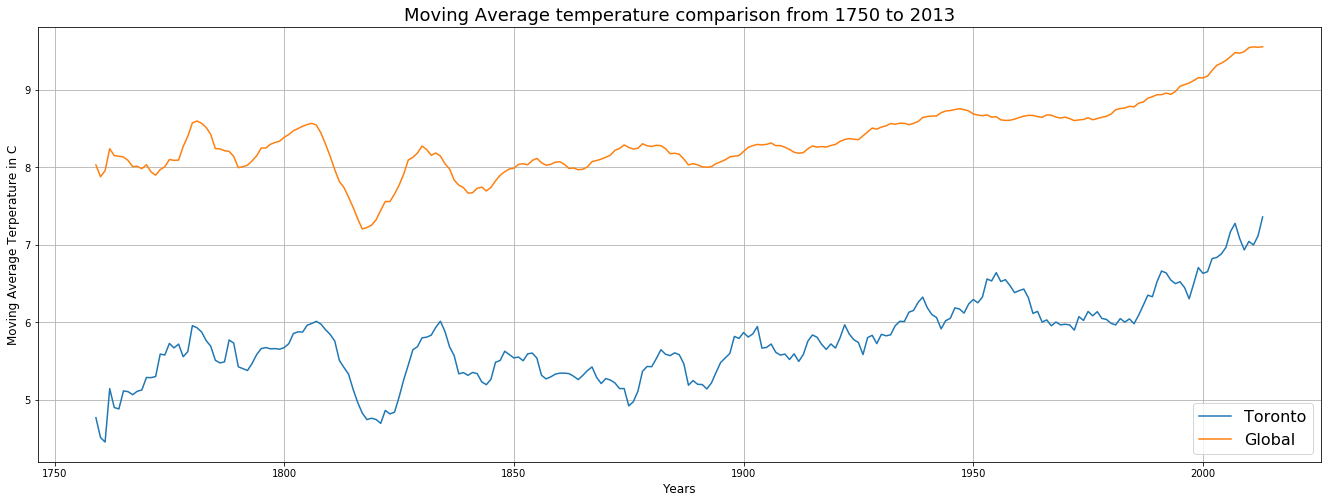

In [84]:
#Visualization of Toronto moving average temperature and global moving average temperature comparison from 1750 to 2013
plt.figure(figsize = (23,8))
plt.ylabel('Moving Average Terperature in C', fontsize = 12)
plt.xlabel('Years', fontsize = 12)
plt.title('Moving Average temperature comparison from 1750 to 2013', fontsize = 18)
plt.grid(True)
plt.plot(df['year'],df['moving_city'], label = 'Toronto')
plt.plot(df['year'],df['moving_global'], label = 'Global')
plt.legend(loc = 4, fontsize = 16);

The moving average line graph, makes it easy to interpret the comparison of the average temperature in Toronto and globally. 

4 Observations:
1.	From the graph, it can be observed that the average global temperature has always been higher than the average global temperature of Toronto.
2.	The graph tells us that the temperature difference between Toronto and Global was higher in the beginning of 1740 but later it has been approximately same. The difference has started to narrow down over the last 20 years.
3.	It can also be observed that the change of average temperature of Toronto was consistent for the first 100 years but later continued to have slight variations for the next 180 years.
4.	The overall trend shows an increase in temperature. In early 1750s, the global average temperature and average temperature of Toronto was around 7.5 and 3 respectively and in 2010, the global average temperature and average temperature of Toronto was around 10 and 8. This illustrates that our planet is getting hotter and hotter over years. 


## Questions

•	Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?


From the line chart, it can be observed that Toronto’s average temperature has been cooler than the global average by about 3 degrees. This has been a consistent trend until 2012 but the difference is reducing in the past few years.


•	“How do the changes in your city’s temperatures over time compare to the changes in the global average?”

The city’s temperature has been consistently lower the global temperature but the city’s change in temperature has not been consistent with change in global average. 


•	What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

It seems the world is getting hotter. The average global temperature in 1752 was around 7.49 but a 100 years later it was 8.045 and 200 years later it was 8.66 with an average increase of .55 every 100 years. At this rate, the temperature should be 9.3 by 2052 but the global average temperature was already 9.67 in 2015. This means that, our planet is getting hotter and hotter and this change is not consistent.
